## Реализация ArcFace loss

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
!unzip "celebA_train_500.zip" # Скачать датасет можно тут: https://disk.yandex.ru/d/S8f03spLIA1wrw

Archive:  celebA_train_500.zip
  inflating: celebA_train_500/.DS_Store  
  inflating: __MACOSX/celebA_train_500/._.DS_Store  
   creating: celebA_train_500/celebA_imgs/
  inflating: celebA_train_500/celebA_train_split.txt  
  inflating: celebA_train_500/celebA_anno.txt  
  inflating: celebA_train_500/celebA_imgs/160856.jpg  
  inflating: celebA_train_500/celebA_imgs/054259.jpg  
  inflating: celebA_train_500/celebA_imgs/157022.jpg  
  inflating: celebA_train_500/celebA_imgs/062933.jpg  
  inflating: celebA_train_500/celebA_imgs/076946.jpg  
  inflating: celebA_train_500/celebA_imgs/115211.jpg  
  inflating: celebA_train_500/celebA_imgs/046885.jpg  
  inflating: celebA_train_500/celebA_imgs/057750.jpg  
  inflating: celebA_train_500/celebA_imgs/008254.jpg  
  inflating: celebA_train_500/celebA_imgs/103473.jpg  
  inflating: celebA_train_500/celebA_imgs/028184.jpg  
  inflating: celebA_train_500/celebA_imgs/000608.jpg  
  inflating: celebA_train_500/celebA_imgs/155635.jpg  
  inflating: 

  inflating: celebA_train_500/celebA_imgs/014279.jpg  
  inflating: celebA_train_500/celebA_imgs/108122.jpg  
  inflating: celebA_train_500/celebA_imgs/161194.jpg  
  inflating: celebA_train_500/celebA_imgs/000224.jpg  
  inflating: celebA_train_500/celebA_imgs/049142.jpg  
  inflating: celebA_train_500/celebA_imgs/082555.jpg  
  inflating: celebA_train_500/celebA_imgs/059351.jpg  
  inflating: celebA_train_500/celebA_imgs/009566.jpg  
  inflating: celebA_train_500/celebA_imgs/084124.jpg  
  inflating: celebA_train_500/celebA_imgs/154107.jpg  
  inflating: celebA_train_500/celebA_imgs/016446.jpg  
  inflating: celebA_train_500/celebA_imgs/140172.jpg  
  inflating: celebA_train_500/celebA_imgs/042017.jpg  
  inflating: celebA_train_500/celebA_imgs/096520.jpg  
  inflating: celebA_train_500/celebA_imgs/045778.jpg  
  inflating: celebA_train_500/celebA_imgs/089400.jpg  
  inflating: celebA_train_500/celebA_imgs/089366.jpg  
  inflating: celebA_train_500/celebA_imgs/106899.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/018126.jpg  
  inflating: celebA_train_500/celebA_imgs/048705.jpg  
  inflating: celebA_train_500/celebA_imgs/076833.jpg  
  inflating: celebA_train_500/celebA_imgs/093101.jpg  
  inflating: celebA_train_500/celebA_imgs/155740.jpg  
  inflating: celebA_train_500/celebA_imgs/017201.jpg  
  inflating: celebA_train_500/celebA_imgs/144895.jpg  
  inflating: celebA_train_500/celebA_imgs/104269.jpg  
  inflating: celebA_train_500/celebA_imgs/109995.jpg  
  inflating: celebA_train_500/celebA_imgs/012379.jpg  
  inflating: celebA_train_500/celebA_imgs/147344.jpg  
  inflating: celebA_train_500/celebA_imgs/101311.jpg  
  inflating: celebA_train_500/celebA_imgs/097367.jpg  
  inflating: celebA_train_500/celebA_imgs/158502.jpg  
  inflating: celebA_train_500/celebA_imgs/106318.jpg  
  inflating: celebA_train_500/celebA_imgs/157631.jpg  
  inflating: celebA_train_500/celebA_imgs/055754.jpg  
  inflating: celebA_train_500/celebA_imgs/117215.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/067862.jpg  
  inflating: celebA_train_500/celebA_imgs/026180.jpg  
  inflating: celebA_train_500/celebA_imgs/113891.jpg  
  inflating: celebA_train_500/celebA_imgs/132687.jpg  
  inflating: celebA_train_500/celebA_imgs/036393.jpg  
  inflating: celebA_train_500/celebA_imgs/112557.jpg  
  inflating: celebA_train_500/celebA_imgs/137927.jpg  
  inflating: celebA_train_500/celebA_imgs/098108.jpg  
  inflating: celebA_train_500/celebA_imgs/128807.jpg  
  inflating: celebA_train_500/celebA_imgs/025489.jpg  
  inflating: celebA_train_500/celebA_imgs/091892.jpg  
  inflating: celebA_train_500/celebA_imgs/024797.jpg  
  inflating: celebA_train_500/celebA_imgs/005981.jpg  
  inflating: celebA_train_500/celebA_imgs/156315.jpg  
  inflating: celebA_train_500/celebA_imgs/086336.jpg  
  inflating: celebA_train_500/celebA_imgs/141669.jpg  
  inflating: celebA_train_500/celebA_imgs/101259.jpg  
  inflating: celebA_train_500/celebA_imgs/119416.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/028597.jpg  
  inflating: celebA_train_500/celebA_imgs/095016.jpg  
  inflating: celebA_train_500/celebA_imgs/057343.jpg  
  inflating: celebA_train_500/celebA_imgs/083674.jpg  
  inflating: celebA_train_500/celebA_imgs/011316.jpg  
  inflating: celebA_train_500/celebA_imgs/153657.jpg  
  inflating: celebA_train_500/celebA_imgs/077093.jpg  
  inflating: celebA_train_500/celebA_imgs/116323.jpg  
  inflating: celebA_train_500/celebA_imgs/100541.jpg  
  inflating: celebA_train_500/celebA_imgs/052213.jpg  
  inflating: celebA_train_500/celebA_imgs/086724.jpg  
  inflating: celebA_train_500/celebA_imgs/000233.jpg  
  inflating: celebA_train_500/celebA_imgs/069285.jpg  
  inflating: celebA_train_500/celebA_imgs/152561.jpg  
  inflating: celebA_train_500/celebA_imgs/092989.jpg  
  inflating: celebA_train_500/celebA_imgs/026592.jpg  
  inflating: celebA_train_500/celebA_imgs/084133.jpg  
  inflating: celebA_train_500/celebA_imgs/016451.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/085006.jpg  
  inflating: celebA_train_500/celebA_imgs/007777.jpg  
  inflating: celebA_train_500/celebA_imgs/083477.jpg  
  inflating: celebA_train_500/celebA_imgs/047353.jpg  
  inflating: celebA_train_500/celebA_imgs/056538.jpg  
  inflating: celebA_train_500/celebA_imgs/007011.jpg  
  inflating: celebA_train_500/celebA_imgs/049418.jpg  
  inflating: celebA_train_500/celebA_imgs/086269.jpg  
  inflating: celebA_train_500/celebA_imgs/126975.jpg  
  inflating: celebA_train_500/celebA_imgs/073948.jpg  
  inflating: celebA_train_500/celebA_imgs/097364.jpg  
  inflating: celebA_train_500/celebA_imgs/087177.jpg  
  inflating: celebA_train_500/celebA_imgs/053440.jpg  
  inflating: celebA_train_500/celebA_imgs/158267.jpg  
  inflating: celebA_train_500/celebA_imgs/141722.jpg  
  inflating: celebA_train_500/celebA_imgs/013070.jpg  
  inflating: celebA_train_500/celebA_imgs/062851.jpg  
  inflating: celebA_train_500/celebA_imgs/105160.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/053508.jpg  
  inflating: celebA_train_500/celebA_imgs/137930.jpg  
  inflating: celebA_train_500/celebA_imgs/091885.jpg  
  inflating: celebA_train_500/celebA_imgs/128810.jpg  
  inflating: celebA_train_500/celebA_imgs/110357.jpg  
  inflating: celebA_train_500/celebA_imgs/000636.jpg  
  inflating: celebA_train_500/celebA_imgs/145418.jpg  
  inflating: celebA_train_500/celebA_imgs/027289.jpg  
  inflating: celebA_train_500/celebA_imgs/079493.jpg  
  inflating: celebA_train_500/celebA_imgs/132690.jpg  
  inflating: celebA_train_500/celebA_imgs/000622.jpg  
  inflating: celebA_train_500/celebA_imgs/056464.jpg  
  inflating: celebA_train_500/celebA_imgs/113892.jpg  
  inflating: celebA_train_500/celebA_imgs/137924.jpg  
  inflating: celebA_train_500/celebA_imgs/099215.jpg  
  inflating: celebA_train_500/celebA_imgs/120280.jpg  
  inflating: celebA_train_500/celebA_imgs/146105.jpg  
  inflating: celebA_train_500/celebA_imgs/091649.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/000222.jpg  
  inflating: celebA_train_500/celebA_imgs/016440.jpg  
  inflating: celebA_train_500/celebA_imgs/027845.jpg  
  inflating: celebA_train_500/celebA_imgs/105428.jpg  
  inflating: celebA_train_500/celebA_imgs/019773.jpg  
  inflating: celebA_train_500/celebA_imgs/038965.jpg  
  inflating: celebA_train_500/celebA_imgs/017986.jpg  
  inflating: celebA_train_500/celebA_imgs/122097.jpg  
  inflating: celebA_train_500/celebA_imgs/009560.jpg  
  inflating: celebA_train_500/celebA_imgs/092998.jpg  
  inflating: celebA_train_500/celebA_imgs/044460.jpg  
  inflating: celebA_train_500/celebA_imgs/035299.jpg  
  inflating: celebA_train_500/celebA_imgs/157408.jpg  
  inflating: celebA_train_500/celebA_imgs/091249.jpg  
  inflating: celebA_train_500/celebA_imgs/151079.jpg  
  inflating: celebA_train_500/celebA_imgs/064968.jpg  
  inflating: celebA_train_500/celebA_imgs/096526.jpg  
  inflating: celebA_train_500/celebA_imgs/118479.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/057384.jpg  
  inflating: celebA_train_500/celebA_imgs/145794.jpg  
  inflating: celebA_train_500/celebA_imgs/084862.jpg  
  inflating: celebA_train_500/celebA_imgs/090817.jpg  
  inflating: celebA_train_500/celebA_imgs/033170.jpg  
  inflating: celebA_train_500/celebA_imgs/098293.jpg  
  inflating: celebA_train_500/celebA_imgs/072892.jpg  
  inflating: celebA_train_500/celebA_imgs/128550.jpg  
  inflating: celebA_train_500/celebA_imgs/098287.jpg  
  inflating: celebA_train_500/celebA_imgs/043483.jpg  
  inflating: celebA_train_500/celebA_imgs/108858.jpg  
  inflating: celebA_train_500/celebA_imgs/125074.jpg  
  inflating: celebA_train_500/celebA_imgs/070049.jpg  
  inflating: celebA_train_500/celebA_imgs/001868.jpg  
  inflating: celebA_train_500/celebA_imgs/037302.jpg  
  inflating: celebA_train_500/celebA_imgs/162459.jpg  
  inflating: celebA_train_500/celebA_imgs/040834.jpg  
  inflating: celebA_train_500/celebA_imgs/018487.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/147222.jpg  
  inflating: celebA_train_500/celebA_imgs/111064.jpg  
  inflating: celebA_train_500/celebA_imgs/044059.jpg  
  inflating: celebA_train_500/celebA_imgs/139930.jpg  
  inflating: celebA_train_500/celebA_imgs/107606.jpg  
  inflating: celebA_train_500/celebA_imgs/103460.jpg  
  inflating: celebA_train_500/celebA_imgs/092379.jpg  
  inflating: celebA_train_500/celebA_imgs/017367.jpg  
  inflating: celebA_train_500/celebA_imgs/091880.jpg  
  inflating: celebA_train_500/celebA_imgs/119410.jpg  
  inflating: celebA_train_500/celebA_imgs/140565.jpg  
  inflating: celebA_train_500/celebA_imgs/090546.jpg  
  inflating: celebA_train_500/celebA_imgs/089017.jpg  
  inflating: celebA_train_500/celebA_imgs/005993.jpg  
  inflating: celebA_train_500/celebA_imgs/014646.jpg  
  inflating: celebA_train_500/celebA_imgs/073805.jpg  
  inflating: celebA_train_500/celebA_imgs/041109.jpg  
  inflating: celebA_train_500/celebA_imgs/059746.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/091262.jpg  
  inflating: celebA_train_500/celebA_imgs/081717.jpg  
  inflating: celebA_train_500/celebA_imgs/118452.jpg  
  inflating: celebA_train_500/celebA_imgs/088055.jpg  
  inflating: celebA_train_500/celebA_imgs/080409.jpg  
  inflating: celebA_train_500/celebA_imgs/043442.jpg  
  inflating: celebA_train_500/celebA_imgs/011462.jpg  
  inflating: celebA_train_500/celebA_imgs/105365.jpg  
  inflating: celebA_train_500/celebA_imgs/143330.jpg  
  inflating: celebA_train_500/celebA_imgs/070088.jpg  
  inflating: celebA_train_500/celebA_imgs/155552.jpg  
  inflating: celebA_train_500/celebA_imgs/085571.jpg  
  inflating: celebA_train_500/celebA_imgs/056729.jpg  
  inflating: celebA_train_500/celebA_imgs/000584.jpg  
  inflating: celebA_train_500/celebA_imgs/079721.jpg  
  inflating: celebA_train_500/celebA_imgs/114283.jpg  
  inflating: celebA_train_500/celebA_imgs/134153.jpg  
  inflating: celebA_train_500/celebA_imgs/122731.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/068639.jpg  
  inflating: celebA_train_500/celebA_imgs/084849.jpg  
  inflating: celebA_train_500/celebA_imgs/058922.jpg  
  inflating: celebA_train_500/celebA_imgs/000591.jpg  
  inflating: celebA_train_500/celebA_imgs/072661.jpg  
  inflating: celebA_train_500/celebA_imgs/053877.jpg  
  inflating: celebA_train_500/celebA_imgs/096295.jpg  
  inflating: celebA_train_500/celebA_imgs/015822.jpg  
  inflating: celebA_train_500/celebA_imgs/032245.jpg  
  inflating: celebA_train_500/celebA_imgs/065309.jpg  
  inflating: celebA_train_500/celebA_imgs/149191.jpg  
  inflating: celebA_train_500/celebA_imgs/138768.jpg  
  inflating: celebA_train_500/celebA_imgs/136745.jpg  
  inflating: celebA_train_500/celebA_imgs/108873.jpg  
  inflating: celebA_train_500/celebA_imgs/081925.jpg  
  inflating: celebA_train_500/celebA_imgs/145973.jpg  
  inflating: celebA_train_500/celebA_imgs/029117.jpg  
  inflating: celebA_train_500/celebA_imgs/028209.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/002755.jpg  
  inflating: celebA_train_500/celebA_imgs/148648.jpg  
  inflating: celebA_train_500/celebA_imgs/071963.jpg  
  inflating: celebA_train_500/celebA_imgs/102027.jpg  
  inflating: celebA_train_500/celebA_imgs/125498.jpg  
  inflating: celebA_train_500/celebA_imgs/016720.jpg  
  inflating: celebA_train_500/celebA_imgs/000142.jpg  
  inflating: celebA_train_500/celebA_imgs/049224.jpg  
  inflating: celebA_train_500/celebA_imgs/124786.jpg  
  inflating: celebA_train_500/celebA_imgs/041678.jpg  
  inflating: celebA_train_500/celebA_imgs/134595.jpg  
  inflating: celebA_train_500/celebA_imgs/001248.jpg  
  inflating: celebA_train_500/celebA_imgs/021198.jpg  
  inflating: celebA_train_500/celebA_imgs/112220.jpg  
  inflating: celebA_train_500/celebA_imgs/104442.jpg  
  inflating: celebA_train_500/celebA_imgs/000156.jpg  
  inflating: celebA_train_500/celebA_imgs/010345.jpg  
  inflating: celebA_train_500/celebA_imgs/145378.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/070039.jpg  
  inflating: celebA_train_500/celebA_imgs/078465.jpg  
  inflating: celebA_train_500/celebA_imgs/057486.jpg  
  inflating: celebA_train_500/celebA_imgs/023307.jpg  
  inflating: celebA_train_500/celebA_imgs/065352.jpg  
  inflating: celebA_train_500/celebA_imgs/053838.jpg  
  inflating: celebA_train_500/celebA_imgs/140850.jpg  
  inflating: celebA_train_500/celebA_imgs/024468.jpg  
  inflating: celebA_train_500/celebA_imgs/033672.jpg  
  inflating: celebA_train_500/celebA_imgs/023461.jpg  
  inflating: celebA_train_500/celebA_imgs/065434.jpg  
  inflating: celebA_train_500/celebA_imgs/072148.jpg  
  inflating: celebA_train_500/celebA_imgs/130409.jpg  
  inflating: celebA_train_500/celebA_imgs/088782.jpg  
  inflating: celebA_train_500/celebA_imgs/035203.jpg  
  inflating: celebA_train_500/celebA_imgs/156954.jpg  
  inflating: celebA_train_500/celebA_imgs/136078.jpg  
  inflating: celebA_train_500/celebA_imgs/098591.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/056799.jpg  
  inflating: celebA_train_500/celebA_imgs/155284.jpg  
  inflating: celebA_train_500/celebA_imgs/006810.jpg  
  inflating: celebA_train_500/celebA_imgs/039438.jpg  
  inflating: celebA_train_500/celebA_imgs/068111.jpg  
  inflating: celebA_train_500/celebA_imgs/063044.jpg  
  inflating: celebA_train_500/celebA_imgs/147680.jpg  
  inflating: celebA_train_500/celebA_imgs/073257.jpg  
  inflating: celebA_train_500/celebA_imgs/157493.jpg  
  inflating: celebA_train_500/celebA_imgs/052299.jpg  
  inflating: celebA_train_500/celebA_imgs/023460.jpg  
  inflating: celebA_train_500/celebA_imgs/158978.jpg  
  inflating: celebA_train_500/celebA_imgs/137367.jpg  
  inflating: celebA_train_500/celebA_imgs/091239.jpg  
  inflating: celebA_train_500/celebA_imgs/089476.jpg  
  inflating: celebA_train_500/celebA_imgs/064918.jpg  
  inflating: celebA_train_500/celebA_imgs/033840.jpg  
  inflating: celebA_train_500/celebA_imgs/047119.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/093982.jpg  
  inflating: celebA_train_500/celebA_imgs/056360.jpg  
  inflating: celebA_train_500/celebA_imgs/006557.jpg  
  inflating: celebA_train_500/celebA_imgs/036494.jpg  
  inflating: celebA_train_500/celebA_imgs/154563.jpg  
  inflating: celebA_train_500/celebA_imgs/057718.jpg  
  inflating: celebA_train_500/celebA_imgs/000898.jpg  
  inflating: celebA_train_500/celebA_imgs/124084.jpg  
  inflating: celebA_train_500/celebA_imgs/000640.jpg  
  inflating: celebA_train_500/celebA_imgs/003349.jpg  
  inflating: celebA_train_500/celebA_imgs/141608.jpg  
  inflating: celebA_train_500/celebA_imgs/023099.jpg  
  inflating: celebA_train_500/celebA_imgs/100132.jpg  
  inflating: celebA_train_500/celebA_imgs/150705.jpg  
  inflating: celebA_train_500/celebA_imgs/098169.jpg  
  inflating: celebA_train_500/celebA_imgs/054211.jpg  
  inflating: celebA_train_500/celebA_imgs/080726.jpg  
  inflating: celebA_train_500/celebA_imgs/119463.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/103215.jpg  
  inflating: celebA_train_500/celebA_imgs/050881.jpg  
  inflating: celebA_train_500/celebA_imgs/026917.jpg  
  inflating: celebA_train_500/celebA_imgs/018621.jpg  
  inflating: celebA_train_500/celebA_imgs/032962.jpg  
  inflating: celebA_train_500/celebA_imgs/128090.jpg  
  inflating: celebA_train_500/celebA_imgs/091005.jpg  
  inflating: celebA_train_500/celebA_imgs/151235.jpg  
  inflating: celebA_train_500/celebA_imgs/097474.jpg  
  inflating: celebA_train_500/celebA_imgs/080108.jpg  
  inflating: celebA_train_500/celebA_imgs/148764.jpg  
  inflating: celebA_train_500/celebA_imgs/098747.jpg  
  inflating: celebA_train_500/celebA_imgs/140338.jpg  
  inflating: celebA_train_500/celebA_imgs/015463.jpg  
  inflating: celebA_train_500/celebA_imgs/062833.jpg  
  inflating: celebA_train_500/celebA_imgs/116618.jpg  
  inflating: celebA_train_500/celebA_imgs/013012.jpg  
  inflating: celebA_train_500/celebA_imgs/161490.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/085267.jpg  
  inflating: celebA_train_500/celebA_imgs/040885.jpg  
  inflating: celebA_train_500/celebA_imgs/122972.jpg  
  inflating: celebA_train_500/celebA_imgs/051036.jpg  
  inflating: celebA_train_500/celebA_imgs/076489.jpg  
  inflating: celebA_train_500/celebA_imgs/153153.jpg  
  inflating: celebA_train_500/celebA_imgs/057447.jpg  
  inflating: celebA_train_500/celebA_imgs/105315.jpg  
  inflating: celebA_train_500/celebA_imgs/112669.jpg  
  inflating: celebA_train_500/celebA_imgs/015674.jpg  
  inflating: celebA_train_500/celebA_imgs/087316.jpg  
  inflating: celebA_train_500/celebA_imgs/097105.jpg  
  inflating: celebA_train_500/celebA_imgs/005467.jpg  
  inflating: celebA_train_500/celebA_imgs/147126.jpg  
  inflating: celebA_train_500/celebA_imgs/140891.jpg  
  inflating: celebA_train_500/celebA_imgs/013205.jpg  
  inflating: celebA_train_500/celebA_imgs/081767.jpg  
  inflating: celebA_train_500/celebA_imgs/107502.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/157912.jpg  
  inflating: celebA_train_500/celebA_imgs/139013.jpg  
  inflating: celebA_train_500/celebA_imgs/160166.jpg  
  inflating: celebA_train_500/celebA_imgs/148826.jpg  
  inflating: celebA_train_500/celebA_imgs/110495.jpg  
  inflating: celebA_train_500/celebA_imgs/127239.jpg  
  inflating: celebA_train_500/celebA_imgs/062017.jpg  
  inflating: celebA_train_500/celebA_imgs/024042.jpg  
  inflating: celebA_train_500/celebA_imgs/129214.jpg  
  inflating: celebA_train_500/celebA_imgs/036446.jpg  
  inflating: celebA_train_500/celebA_imgs/030037.jpg  
  inflating: celebA_train_500/celebA_imgs/028678.jpg  
  inflating: celebA_train_500/celebA_imgs/105926.jpg  
  inflating: celebA_train_500/celebA_imgs/094959.jpg  
  inflating: celebA_train_500/celebA_imgs/000692.jpg  
  inflating: celebA_train_500/celebA_imgs/030751.jpg  
  inflating: celebA_train_500/celebA_imgs/134245.jpg  
  inflating: celebA_train_500/celebA_imgs/079437.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/028095.jpg  
  inflating: celebA_train_500/celebA_imgs/000719.jpg  
  inflating: celebA_train_500/celebA_imgs/085707.jpg  
  inflating: celebA_train_500/celebA_imgs/113771.jpg  
  inflating: celebA_train_500/celebA_imgs/093165.jpg  
  inflating: celebA_train_500/celebA_imgs/105113.jpg  
  inflating: celebA_train_500/celebA_imgs/074098.jpg  
  inflating: celebA_train_500/celebA_imgs/065195.jpg  
  inflating: celebA_train_500/celebA_imgs/117517.jpg  
  inflating: celebA_train_500/celebA_imgs/091799.jpg  
  inflating: celebA_train_500/celebA_imgs/005852.jpg  
  inflating: celebA_train_500/celebA_imgs/035991.jpg  
  inflating: celebA_train_500/celebA_imgs/035749.jpg  
  inflating: celebA_train_500/celebA_imgs/129412.jpg  
  inflating: celebA_train_500/celebA_imgs/090487.jpg  
  inflating: celebA_train_500/celebA_imgs/016190.jpg  
  inflating: celebA_train_500/celebA_imgs/039173.jpg  
  inflating: celebA_train_500/celebA_imgs/006383.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/088197.jpg  
  inflating: celebA_train_500/celebA_imgs/043580.jpg  
  inflating: celebA_train_500/celebA_imgs/121311.jpg  
  inflating: celebA_train_500/celebA_imgs/129995.jpg  
  inflating: celebA_train_500/celebA_imgs/060359.jpg  
  inflating: celebA_train_500/celebA_imgs/135364.jpg  
  inflating: celebA_train_500/celebA_imgs/010866.jpg  
  inflating: celebA_train_500/celebA_imgs/047080.jpg  
  inflating: celebA_train_500/celebA_imgs/009489.jpg  
  inflating: celebA_train_500/celebA_imgs/030208.jpg  
  inflating: celebA_train_500/celebA_imgs/133073.jpg  
  inflating: celebA_train_500/celebA_imgs/071532.jpg  
  inflating: celebA_train_500/celebA_imgs/029981.jpg  
  inflating: celebA_train_500/celebA_imgs/075754.jpg  
  inflating: celebA_train_500/celebA_imgs/086804.jpg  
  inflating: celebA_train_500/celebA_imgs/064659.jpg  
  inflating: celebA_train_500/celebA_imgs/099924.jpg  
  inflating: celebA_train_500/celebA_imgs/073325.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/105070.jpg  
  inflating: celebA_train_500/celebA_imgs/103401.jpg  
  inflating: celebA_train_500/celebA_imgs/010469.jpg  
  inflating: celebA_train_500/celebA_imgs/132804.jpg  
  inflating: celebA_train_500/celebA_imgs/104385.jpg  
  inflating: celebA_train_500/celebA_imgs/000691.jpg  
  inflating: celebA_train_500/celebA_imgs/144979.jpg  
  inflating: celebA_train_500/celebA_imgs/026130.jpg  
  inflating: celebA_train_500/celebA_imgs/122424.jpg  
  inflating: celebA_train_500/celebA_imgs/000849.jpg  
  inflating: celebA_train_500/celebA_imgs/113821.jpg  
  inflating: celebA_train_500/celebA_imgs/039010.jpg  
  inflating: celebA_train_500/celebA_imgs/137997.jpg  
  inflating: celebA_train_500/celebA_imgs/002086.jpg  
  inflating: celebA_train_500/celebA_imgs/139762.jpg  
  inflating: celebA_train_500/celebA_imgs/109879.jpg  
  inflating: celebA_train_500/celebA_imgs/005931.jpg  
  inflating: celebA_train_500/celebA_imgs/161509.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/005886.jpg  
  inflating: celebA_train_500/celebA_imgs/086231.jpg  
  inflating: celebA_train_500/celebA_imgs/035945.jpg  
  inflating: celebA_train_500/celebA_imgs/120384.jpg  
  inflating: celebA_train_500/celebA_imgs/067965.jpg  
  inflating: celebA_train_500/celebA_imgs/078845.jpg  
  inflating: celebA_train_500/celebA_imgs/018169.jpg  
  inflating: celebA_train_500/celebA_imgs/000726.jpg  
  inflating: celebA_train_500/celebA_imgs/123855.jpg  
  inflating: celebA_train_500/celebA_imgs/083349.jpg  
  inflating: celebA_train_500/celebA_imgs/094635.jpg  
  inflating: celebA_train_500/celebA_imgs/144616.jpg  
  inflating: celebA_train_500/celebA_imgs/115459.jpg  
  inflating: celebA_train_500/celebA_imgs/071861.jpg  
  inflating: celebA_train_500/celebA_imgs/040464.jpg  
  inflating: celebA_train_500/celebA_imgs/144170.jpg  
  inflating: celebA_train_500/celebA_imgs/154363.jpg  
  inflating: celebA_train_500/celebA_imgs/000040.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/018424.jpg  
  inflating: celebA_train_500/celebA_imgs/071492.jpg  
  inflating: celebA_train_500/celebA_imgs/081013.jpg  
  inflating: celebA_train_500/celebA_imgs/151030.jpg  
  inflating: celebA_train_500/celebA_imgs/022974.jpg  
  inflating: celebA_train_500/celebA_imgs/141223.jpg  
  inflating: celebA_train_500/celebA_imgs/091200.jpg  
  inflating: celebA_train_500/celebA_imgs/107276.jpg  
  inflating: celebA_train_500/celebA_imgs/139398.jpg  
  inflating: celebA_train_500/celebA_imgs/101607.jpg  
  inflating: celebA_train_500/celebA_imgs/086768.jpg  
  inflating: celebA_train_500/celebA_imgs/111400.jpg  
  inflating: celebA_train_500/celebA_imgs/087476.jpg  
  inflating: celebA_train_500/celebA_imgs/080319.jpg  
  inflating: celebA_train_500/celebA_imgs/098556.jpg  
  inflating: celebA_train_500/celebA_imgs/156993.jpg  
  inflating: celebA_train_500/celebA_imgs/155242.jpg  
  inflating: celebA_train_500/celebA_imgs/029835.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/040511.jpg  
  inflating: celebA_train_500/celebA_imgs/102050.jpg  
  inflating: celebA_train_500/celebA_imgs/071914.jpg  
  inflating: celebA_train_500/celebA_imgs/009677.jpg  
  inflating: celebA_train_500/celebA_imgs/016757.jpg  
  inflating: celebA_train_500/celebA_imgs/135824.jpg  
  inflating: celebA_train_500/celebA_imgs/000135.jpg  
  inflating: celebA_train_500/celebA_imgs/060819.jpg  
  inflating: celebA_train_500/celebA_imgs/037799.jpg  
  inflating: celebA_train_500/celebA_imgs/104421.jpg  
  inflating: celebA_train_500/celebA_imgs/145302.jpg  
  inflating: celebA_train_500/celebA_imgs/058347.jpg  
  inflating: celebA_train_500/celebA_imgs/011021.jpg  
  inflating: celebA_train_500/celebA_imgs/115535.jpg  
  inflating: celebA_train_500/celebA_imgs/083543.jpg  
  inflating: celebA_train_500/celebA_imgs/082885.jpg  
  inflating: celebA_train_500/celebA_imgs/131483.jpg  
  inflating: celebA_train_500/celebA_imgs/157706.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/092704.jpg  
  inflating: celebA_train_500/celebA_imgs/125964.jpg  
  inflating: celebA_train_500/celebA_imgs/145048.jpg  
  inflating: celebA_train_500/celebA_imgs/070959.jpg  
  inflating: celebA_train_500/celebA_imgs/009524.jpg  
  inflating: celebA_train_500/celebA_imgs/134869.jpg  
  inflating: celebA_train_500/celebA_imgs/044424.jpg  
  inflating: celebA_train_500/celebA_imgs/109256.jpg  
  inflating: celebA_train_500/celebA_imgs/150323.jpg  
  inflating: celebA_train_500/celebA_imgs/062385.jpg  
  inflating: celebA_train_500/celebA_imgs/088984.jpg  
  inflating: celebA_train_500/celebA_imgs/022979.jpg  
  inflating: celebA_train_500/celebA_imgs/110707.jpg  
  inflating: celebA_train_500/celebA_imgs/150337.jpg  
  inflating: celebA_train_500/celebA_imgs/131905.jpg  
  inflating: celebA_train_500/celebA_imgs/013568.jpg  
  inflating: celebA_train_500/celebA_imgs/100500.jpg  
  inflating: celebA_train_500/celebA_imgs/000272.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/051941.jpg  
  inflating: celebA_train_500/celebA_imgs/145920.jpg  
  inflating: celebA_train_500/celebA_imgs/046583.jpg  
  inflating: celebA_train_500/celebA_imgs/077986.jpg  
  inflating: celebA_train_500/celebA_imgs/027169.jpg  
  inflating: celebA_train_500/celebA_imgs/126505.jpg  
  inflating: celebA_train_500/celebA_imgs/004968.jpg  
  inflating: celebA_train_500/celebA_imgs/073538.jpg  
  inflating: celebA_train_500/celebA_imgs/131079.jpg  
  inflating: celebA_train_500/celebA_imgs/136716.jpg  
  inflating: celebA_train_500/celebA_imgs/108820.jpg  
  inflating: celebA_train_500/celebA_imgs/117914.jpg  
  inflating: celebA_train_500/celebA_imgs/151941.jpg  
  inflating: celebA_train_500/celebA_imgs/108834.jpg  
  inflating: celebA_train_500/celebA_imgs/136702.jpg  
  inflating: celebA_train_500/celebA_imgs/161882.jpg  
  inflating: celebA_train_500/celebA_imgs/122777.jpg  
  inflating: celebA_train_500/celebA_imgs/010909.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/041159.jpg  
  inflating: celebA_train_500/celebA_imgs/114164.jpg  
  inflating: celebA_train_500/celebA_imgs/144753.jpg  
  inflating: celebA_train_500/celebA_imgs/060197.jpg  
  inflating: celebA_train_500/celebA_imgs/030978.jpg  
  inflating: celebA_train_500/celebA_imgs/109653.jpg  
  inflating: celebA_train_500/celebA_imgs/012267.jpg  
  inflating: celebA_train_500/celebA_imgs/054232.jpg  
  inflating: celebA_train_500/celebA_imgs/149277.jpg  
  inflating: celebA_train_500/celebA_imgs/073855.jpg  
  inflating: celebA_train_500/celebA_imgs/089721.jpg  
  inflating: celebA_train_500/celebA_imgs/052125.jpg  
  inflating: celebA_train_500/celebA_imgs/055892.jpg  
  inflating: celebA_train_500/celebA_imgs/002712.jpg  
  inflating: celebA_train_500/celebA_imgs/109135.jpg  
  inflating: celebA_train_500/celebA_imgs/093779.jpg  
  inflating: celebA_train_500/celebA_imgs/029597.jpg  
  inflating: celebA_train_500/celebA_imgs/142444.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/062392.jpg  
  inflating: celebA_train_500/celebA_imgs/014204.jpg  
  inflating: celebA_train_500/celebA_imgs/000271.jpg  
  inflating: celebA_train_500/celebA_imgs/092713.jpg  
  inflating: celebA_train_500/celebA_imgs/152523.jpg  
  inflating: celebA_train_500/celebA_imgs/060585.jpg  
  inflating: celebA_train_500/celebA_imgs/057329.jpg  
  inflating: celebA_train_500/celebA_imgs/019720.jpg  
  inflating: celebA_train_500/celebA_imgs/000265.jpg  
  inflating: celebA_train_500/celebA_imgs/094376.jpg  
  inflating: celebA_train_500/celebA_imgs/040641.jpg  
  inflating: celebA_train_500/celebA_imgs/006614.jpg  
  inflating: celebA_train_500/celebA_imgs/016407.jpg  
  inflating: celebA_train_500/celebA_imgs/106166.jpg  
  inflating: celebA_train_500/celebA_imgs/090110.jpg  
  inflating: celebA_train_500/celebA_imgs/002472.jpg  
  inflating: celebA_train_500/celebA_imgs/156989.jpg  
  inflating: celebA_train_500/celebA_imgs/089441.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/039340.jpg  
  inflating: celebA_train_500/celebA_imgs/066644.jpg  
  inflating: celebA_train_500/celebA_imgs/162350.jpg  
  inflating: celebA_train_500/celebA_imgs/046594.jpg  
  inflating: celebA_train_500/celebA_imgs/122760.jpg  
  inflating: celebA_train_500/celebA_imgs/095900.jpg  
  inflating: celebA_train_500/celebA_imgs/019084.jpg  
  inflating: celebA_train_500/celebA_imgs/090878.jpg  
  inflating: celebA_train_500/celebA_imgs/024463.jpg  
  inflating: celebA_train_500/celebA_imgs/062436.jpg  
  inflating: celebA_train_500/celebA_imgs/081975.jpg  
  inflating: celebA_train_500/celebA_imgs/129153.jpg  
  inflating: celebA_train_500/celebA_imgs/126260.jpg  
  inflating: celebA_train_500/celebA_imgs/088951.jpg  
  inflating: celebA_train_500/celebA_imgs/162422.jpg  
  inflating: celebA_train_500/celebA_imgs/020163.jpg  
  inflating: celebA_train_500/celebA_imgs/124477.jpg  
  inflating: celebA_train_500/celebA_imgs/067228.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/084560.jpg  
  inflating: celebA_train_500/celebA_imgs/106563.jpg  
  inflating: celebA_train_500/celebA_imgs/054231.jpg  
  inflating: celebA_train_500/celebA_imgs/062783.jpg  
  inflating: celebA_train_500/celebA_imgs/081418.jpg  
  inflating: celebA_train_500/celebA_imgs/085656.jpg  
  inflating: celebA_train_500/celebA_imgs/155675.jpg  
  inflating: celebA_train_500/celebA_imgs/000648.jpg  
  inflating: celebA_train_500/celebA_imgs/000890.jpg  
  inflating: celebA_train_500/celebA_imgs/143017.jpg  
  inflating: celebA_train_500/celebA_imgs/019319.jpg  
  inflating: celebA_train_500/celebA_imgs/024926.jpg  
  inflating: celebA_train_500/celebA_imgs/087041.jpg  
  inflating: celebA_train_500/celebA_imgs/005730.jpg  
  inflating: celebA_train_500/celebA_imgs/117446.jpg  
  inflating: celebA_train_500/celebA_imgs/126843.jpg  
  inflating: celebA_train_500/celebA_imgs/003341.jpg  
  inflating: celebA_train_500/celebA_imgs/107655.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/134106.jpg  
  inflating: celebA_train_500/celebA_imgs/057489.jpg  
  inflating: celebA_train_500/celebA_imgs/070036.jpg  
  inflating: celebA_train_500/celebA_imgs/069573.jpg  
  inflating: celebA_train_500/celebA_imgs/046590.jpg  
  inflating: celebA_train_500/celebA_imgs/124301.jpg  
  inflating: celebA_train_500/celebA_imgs/008199.jpg  
  inflating: celebA_train_500/celebA_imgs/030406.jpg  
  inflating: celebA_train_500/celebA_imgs/009287.jpg  
  inflating: celebA_train_500/celebA_imgs/145933.jpg  
  inflating: celebA_train_500/celebA_imgs/081965.jpg  
  inflating: celebA_train_500/celebA_imgs/129625.jpg  
  inflating: celebA_train_500/celebA_imgs/032211.jpg  
  inflating: celebA_train_500/celebA_imgs/062426.jpg  
  inflating: celebA_train_500/celebA_imgs/156797.jpg  
  inflating: celebA_train_500/celebA_imgs/146584.jpg  
  inflating: celebA_train_500/celebA_imgs/088941.jpg  
  inflating: celebA_train_500/celebA_imgs/062340.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/026517.jpg  
  inflating: celebA_train_500/celebA_imgs/008832.jpg  
  inflating: celebA_train_500/celebA_imgs/095905.jpg  
  inflating: celebA_train_500/celebA_imgs/068678.jpg  
  inflating: celebA_train_500/celebA_imgs/070037.jpg  
  inflating: celebA_train_500/celebA_imgs/057488.jpg  
  inflating: celebA_train_500/celebA_imgs/009292.jpg  
  inflating: celebA_train_500/celebA_imgs/024466.jpg  
  inflating: celebA_train_500/celebA_imgs/053836.jpg  
  inflating: celebA_train_500/celebA_imgs/054181.jpg  
  inflating: celebA_train_500/celebA_imgs/140686.jpg  
  inflating: celebA_train_500/celebA_imgs/117906.jpg  
  inflating: celebA_train_500/celebA_imgs/160556.jpg  
  inflating: celebA_train_500/celebA_imgs/034846.jpg  
  inflating: celebA_train_500/celebA_imgs/072813.jpg  
  inflating: celebA_train_500/celebA_imgs/015650.jpg  
  inflating: celebA_train_500/celebA_imgs/111344.jpg  
  inflating: celebA_train_500/celebA_imgs/088001.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/112507.jpg  
  inflating: celebA_train_500/celebA_imgs/060185.jpg  
  inflating: celebA_train_500/celebA_imgs/115268.jpg  
  inflating: celebA_train_500/celebA_imgs/057729.jpg  
  inflating: celebA_train_500/celebA_imgs/010476.jpg  
  inflating: celebA_train_500/celebA_imgs/000665.jpg  
  inflating: celebA_train_500/celebA_imgs/102700.jpg  
  inflating: celebA_train_500/celebA_imgs/006214.jpg  
  inflating: celebA_train_500/celebA_imgs/140533.jpg  
  inflating: celebA_train_500/celebA_imgs/086372.jpg  
  inflating: celebA_train_500/celebA_imgs/159062.jpg  
  inflating: celebA_train_500/celebA_imgs/096607.jpg  
  inflating: celebA_train_500/celebA_imgs/156437.jpg  
  inflating: celebA_train_500/celebA_imgs/086414.jpg  
  inflating: celebA_train_500/celebA_imgs/160185.jpg  
  inflating: celebA_train_500/celebA_imgs/109133.jpg  
  inflating: celebA_train_500/celebA_imgs/140255.jpg  
  inflating: celebA_train_500/celebA_imgs/088439.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/084639.jpg  
  inflating: celebA_train_500/celebA_imgs/000539.jpg  
  inflating: celebA_train_500/celebA_imgs/113551.jpg  
  inflating: celebA_train_500/celebA_imgs/123492.jpg  
  inflating: celebA_train_500/celebA_imgs/112897.jpg  
  inflating: celebA_train_500/celebA_imgs/158020.jpg  
  inflating: celebA_train_500/celebA_imgs/097123.jpg  
  inflating: celebA_train_500/celebA_imgs/148233.jpg  
  inflating: celebA_train_500/celebA_imgs/025791.jpg  
  inflating: celebA_train_500/celebA_imgs/034688.jpg  
  inflating: celebA_train_500/celebA_imgs/043400.jpg  
  inflating: celebA_train_500/celebA_imgs/101141.jpg  
  inflating: celebA_train_500/celebA_imgs/147114.jpg  
  inflating: celebA_train_500/celebA_imgs/025785.jpg  
  inflating: celebA_train_500/celebA_imgs/115134.jpg  
  inflating: celebA_train_500/celebA_imgs/057475.jpg  
  inflating: celebA_train_500/celebA_imgs/047666.jpg  
  inflating: celebA_train_500/celebA_imgs/027192.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/021535.jpg  
  inflating: celebA_train_500/celebA_imgs/016399.jpg  
  inflating: celebA_train_500/celebA_imgs/077773.jpg  
  inflating: celebA_train_500/celebA_imgs/112855.jpg  
  inflating: celebA_train_500/celebA_imgs/084823.jpg  
  inflating: celebA_train_500/celebA_imgs/123450.jpg  
  inflating: celebA_train_500/celebA_imgs/092099.jpg  
  inflating: celebA_train_500/celebA_imgs/138716.jpg  
  inflating: celebA_train_500/celebA_imgs/090856.jpg  
  inflating: celebA_train_500/celebA_imgs/025753.jpg  
  inflating: celebA_train_500/celebA_imgs/139408.jpg  
  inflating: celebA_train_500/celebA_imgs/101197.jpg  
  inflating: celebA_train_500/celebA_imgs/111384.jpg  
  inflating: celebA_train_500/celebA_imgs/047840.jpg  
  inflating: celebA_train_500/celebA_imgs/079776.jpg  
  inflating: celebA_train_500/celebA_imgs/076445.jpg  
  inflating: celebA_train_500/celebA_imgs/020603.jpg  
  inflating: celebA_train_500/celebA_imgs/072623.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/118015.jpg  
  inflating: celebA_train_500/celebA_imgs/055667.jpg  
  inflating: celebA_train_500/celebA_imgs/013632.jpg  
  inflating: celebA_train_500/celebA_imgs/110449.jpg  
  inflating: celebA_train_500/celebA_imgs/109118.jpg  
  inflating: celebA_train_500/celebA_imgs/058343.jpg  
  inflating: celebA_train_500/celebA_imgs/068280.jpg  
  inflating: celebA_train_500/celebA_imgs/026851.jpg  
  inflating: celebA_train_500/celebA_imgs/000128.jpg  
  inflating: celebA_train_500/celebA_imgs/082659.jpg  
  inflating: celebA_train_500/celebA_imgs/096604.jpg  
  inflating: celebA_train_500/celebA_imgs/003409.jpg  
  inflating: celebA_train_500/celebA_imgs/014175.jpg  
  inflating: celebA_train_500/celebA_imgs/130969.jpg  
  inflating: celebA_train_500/celebA_imgs/150045.jpg  
  inflating: celebA_train_500/celebA_imgs/023901.jpg  
  inflating: celebA_train_500/celebA_imgs/119323.jpg  
  inflating: celebA_train_500/celebA_imgs/016762.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/092773.jpg  
  inflating: celebA_train_500/celebA_imgs/077099.jpg  
  inflating: celebA_train_500/celebA_imgs/006660.jpg  
  inflating: celebA_train_500/celebA_imgs/016473.jpg  
  inflating: celebA_train_500/celebA_imgs/033803.jpg  
  inflating: celebA_train_500/celebA_imgs/090164.jpg  
  inflating: celebA_train_500/celebA_imgs/158708.jpg  
  inflating: celebA_train_500/celebA_imgs/147628.jpg  
  inflating: celebA_train_500/celebA_imgs/119032.jpg  
  inflating: celebA_train_500/celebA_imgs/100563.jpg  
  inflating: celebA_train_500/celebA_imgs/042022.jpg  
  inflating: celebA_train_500/celebA_imgs/161189.jpg  
  inflating: celebA_train_500/celebA_imgs/086706.jpg  
  inflating: celebA_train_500/celebA_imgs/137324.jpg  
  inflating: celebA_train_500/celebA_imgs/033630.jpg  
  inflating: celebA_train_500/celebA_imgs/128204.jpg  
  inflating: celebA_train_500/celebA_imgs/127137.jpg  
  inflating: celebA_train_500/celebA_imgs/065476.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/076423.jpg  
  inflating: celebA_train_500/celebA_imgs/134604.jpg  
  inflating: celebA_train_500/celebA_imgs/083864.jpg  
  inflating: celebA_train_500/celebA_imgs/125709.jpg  
  inflating: celebA_train_500/celebA_imgs/078368.jpg  
  inflating: celebA_train_500/celebA_imgs/136013.jpg  
  inflating: celebA_train_500/celebA_imgs/044491.jpg  
  inflating: celebA_train_500/celebA_imgs/075894.jpg  
  inflating: celebA_train_500/celebA_imgs/024365.jpg  
  inflating: celebA_train_500/celebA_imgs/140191.jpg  
  inflating: celebA_train_500/celebA_imgs/126214.jpg  
  inflating: celebA_train_500/celebA_imgs/022700.jpg  
  inflating: celebA_train_500/celebA_imgs/072137.jpg  
  inflating: celebA_train_500/celebA_imgs/088925.jpg  
  inflating: celebA_train_500/celebA_imgs/158906.jpg  
  inflating: celebA_train_500/celebA_imgs/027678.jpg  
  inflating: celebA_train_500/celebA_imgs/083870.jpg  
  inflating: celebA_train_500/celebA_imgs/135268.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/145374.jpg  
  inflating: celebA_train_500/celebA_imgs/039903.jpg  
  inflating: celebA_train_500/celebA_imgs/105988.jpg  
  inflating: celebA_train_500/celebA_imgs/152608.jpg  
  inflating: celebA_train_500/celebA_imgs/113132.jpg  
  inflating: celebA_train_500/celebA_imgs/092438.jpg  
  inflating: celebA_train_500/celebA_imgs/007153.jpg  
  inflating: celebA_train_500/celebA_imgs/132842.jpg  
  inflating: celebA_train_500/celebA_imgs/115225.jpg  
  inflating: celebA_train_500/celebA_imgs/030927.jpg  
  inflating: celebA_train_500/celebA_imgs/143063.jpg  
  inflating: celebA_train_500/celebA_imgs/158325.jpg  
  inflating: celebA_train_500/celebA_imgs/126837.jpg  
  inflating: celebA_train_500/celebA_imgs/034599.jpg  
  inflating: celebA_train_500/celebA_imgs/091657.jpg  
  inflating: celebA_train_500/celebA_imgs/158331.jpg  
  inflating: celebA_train_500/celebA_imgs/087021.jpg  
  inflating: celebA_train_500/celebA_imgs/109618.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/036987.jpg  
  inflating: celebA_train_500/celebA_imgs/123346.jpg  
  inflating: celebA_train_500/celebA_imgs/065461.jpg  
  inflating: celebA_train_500/celebA_imgs/128213.jpg  
  inflating: celebA_train_500/celebA_imgs/099802.jpg  
  inflating: celebA_train_500/celebA_imgs/101681.jpg  
  inflating: celebA_train_500/celebA_imgs/005395.jpg  
  inflating: celebA_train_500/celebA_imgs/121551.jpg  
  inflating: celebA_train_500/celebA_imgs/064019.jpg  
  inflating: celebA_train_500/celebA_imgs/004935.jpg  
  inflating: celebA_train_500/celebA_imgs/158092.jpg  
  inflating: celebA_train_500/celebA_imgs/106688.jpg  
  inflating: celebA_train_500/celebA_imgs/065307.jpg  
  inflating: celebA_train_500/celebA_imgs/015838.jpg  
  inflating: celebA_train_500/celebA_imgs/033141.jpg  
  inflating: celebA_train_500/celebA_imgs/106850.jpg  
  inflating: celebA_train_500/celebA_imgs/038014.jpg  
  inflating: celebA_train_500/celebA_imgs/010940.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/143672.jpg  
  inflating: celebA_train_500/celebA_imgs/026203.jpg  
  inflating: celebA_train_500/celebA_imgs/060256.jpg  
  inflating: celebA_train_500/celebA_imgs/154681.jpg  
  inflating: celebA_train_500/celebA_imgs/123409.jpg  
  inflating: celebA_train_500/celebA_imgs/130313.jpg  
  inflating: celebA_train_500/celebA_imgs/063987.jpg  
  inflating: celebA_train_500/celebA_imgs/126571.jpg  
  inflating: celebA_train_500/celebA_imgs/081902.jpg  
  inflating: celebA_train_500/celebA_imgs/136762.jpg  
  inflating: celebA_train_500/celebA_imgs/139451.jpg  
  inflating: celebA_train_500/celebA_imgs/127109.jpg  
  inflating: celebA_train_500/celebA_imgs/101870.jpg  
  inflating: celebA_train_500/celebA_imgs/062327.jpg  
  inflating: celebA_train_500/celebA_imgs/079061.jpg  
  inflating: celebA_train_500/celebA_imgs/008698.jpg  
  inflating: celebA_train_500/celebA_imgs/028548.jpg  
  inflating: celebA_train_500/celebA_imgs/076352.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/117394.jpg  
  inflating: celebA_train_500/celebA_imgs/121815.jpg  
  inflating: celebA_train_500/celebA_imgs/052151.jpg  
  inflating: celebA_train_500/celebA_imgs/014104.jpg  
  inflating: celebA_train_500/celebA_imgs/096675.jpg  
  inflating: celebA_train_500/celebA_imgs/129291.jpg  
  inflating: celebA_train_500/celebA_imgs/048109.jpg  
  inflating: celebA_train_500/celebA_imgs/059004.jpg  
  inflating: celebA_train_500/celebA_imgs/082600.jpg  
  inflating: celebA_train_500/celebA_imgs/071788.jpg  
  inflating: celebA_train_500/celebA_imgs/000171.jpg  
  inflating: celebA_train_500/celebA_imgs/092413.jpg  
  inflating: celebA_train_500/celebA_imgs/000617.jpg  
  inflating: celebA_train_500/celebA_imgs/021801.jpg  
  inflating: celebA_train_500/celebA_imgs/114110.jpg  
  inflating: celebA_train_500/celebA_imgs/040233.jpg  
  inflating: celebA_train_500/celebA_imgs/054246.jpg  
  inflating: celebA_train_500/celebA_imgs/119434.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/090162.jpg  
  inflating: celebA_train_500/celebA_imgs/075850.jpg  
  inflating: celebA_train_500/celebA_imgs/160291.jpg  
  inflating: celebA_train_500/celebA_imgs/014262.jpg  
  inflating: celebA_train_500/celebA_imgs/015168.jpg  
  inflating: celebA_train_500/celebA_imgs/089427.jpg  
  inflating: celebA_train_500/celebA_imgs/156737.jpg  
  inflating: celebA_train_500/celebA_imgs/086714.jpg  
  inflating: celebA_train_500/celebA_imgs/103078.jpg  
  inflating: celebA_train_500/celebA_imgs/049165.jpg  
  inflating: celebA_train_500/celebA_imgs/000203.jpg  
  inflating: celebA_train_500/celebA_imgs/047148.jpg  
  inflating: celebA_train_500/celebA_imgs/040627.jpg  
  inflating: celebA_train_500/celebA_imgs/009541.jpg  
  inflating: celebA_train_500/celebA_imgs/094476.jpg  
  inflating: celebA_train_500/celebA_imgs/133805.jpg  
  inflating: celebA_train_500/celebA_imgs/011468.jpg  
  inflating: celebA_train_500/celebA_imgs/070082.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/143887.jpg  
  inflating: celebA_train_500/celebA_imgs/162691.jpg  
  inflating: celebA_train_500/celebA_imgs/026979.jpg  
  inflating: celebA_train_500/celebA_imgs/112376.jpg  
  inflating: celebA_train_500/celebA_imgs/084300.jpg  
  inflating: celebA_train_500/celebA_imgs/040424.jpg  
  inflating: celebA_train_500/celebA_imgs/009742.jpg  
  inflating: celebA_train_500/celebA_imgs/008448.jpg  
  inflating: celebA_train_500/celebA_imgs/017568.jpg  
  inflating: celebA_train_500/celebA_imgs/092576.jpg  
  inflating: celebA_train_500/celebA_imgs/060938.jpg  
  inflating: celebA_train_500/celebA_imgs/000014.jpg  
  inflating: celebA_train_500/celebA_imgs/071835.jpg  
  inflating: celebA_train_500/celebA_imgs/119237.jpg  
  inflating: celebA_train_500/celebA_imgs/065840.jpg  
  inflating: celebA_train_500/celebA_imgs/044656.jpg  
  inflating: celebA_train_500/celebA_imgs/064586.jpg  
  inflating: celebA_train_500/celebA_imgs/013068.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/132688.jpg  
  inflating: celebA_train_500/celebA_imgs/143071.jpg  
  inflating: celebA_train_500/celebA_imgs/001530.jpg  
  inflating: celebA_train_500/celebA_imgs/076960.jpg  
  inflating: celebA_train_500/celebA_imgs/115237.jpg  
  inflating: celebA_train_500/celebA_imgs/083241.jpg  
  inflating: celebA_train_500/celebA_imgs/019419.jpg  
  inflating: celebA_train_500/celebA_imgs/018707.jpg  
  inflating: celebA_train_500/celebA_imgs/000148.jpg  
  inflating: celebA_train_500/celebA_imgs/155175.jpg  
  inflating: celebA_train_500/celebA_imgs/007627.jpg  
  inflating: celebA_train_500/celebA_imgs/103333.jpg  
  inflating: celebA_train_500/celebA_imgs/095345.jpg  
  inflating: celebA_train_500/celebA_imgs/033582.jpg  
  inflating: celebA_train_500/celebA_imgs/052168.jpg  
  inflating: celebA_train_500/celebA_imgs/053276.jpg  
  inflating: celebA_train_500/celebA_imgs/157762.jpg  
  inflating: celebA_train_500/celebA_imgs/158451.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/082203.jpg  
  inflating: celebA_train_500/celebA_imgs/114275.jpg  
  inflating: celebA_train_500/celebA_imgs/068802.jpg  
  inflating: celebA_train_500/celebA_imgs/081722.jpg  
  inflating: celebA_train_500/celebA_imgs/106881.jpg  
  inflating: celebA_train_500/celebA_imgs/118467.jpg  
  inflating: celebA_train_500/celebA_imgs/107547.jpg  
  inflating: celebA_train_500/celebA_imgs/053664.jpg  
  inflating: celebA_train_500/celebA_imgs/094449.jpg  
  inflating: celebA_train_500/celebA_imgs/011457.jpg  
  inflating: celebA_train_500/celebA_imgs/125080.jpg  
  inflating: celebA_train_500/celebA_imgs/092038.jpg  
  inflating: celebA_train_500/celebA_imgs/041506.jpg  
  inflating: celebA_train_500/celebA_imgs/027683.jpg  
  inflating: celebA_train_500/celebA_imgs/113254.jpg  
  inflating: celebA_train_500/celebA_imgs/133184.jpg  
  inflating: celebA_train_500/celebA_imgs/134833.jpg  
  inflating: celebA_train_500/celebA_imgs/048244.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/118658.jpg  
  inflating: celebA_train_500/celebA_imgs/004503.jpg  
  inflating: celebA_train_500/celebA_imgs/072495.jpg  
  inflating: celebA_train_500/celebA_imgs/044127.jpg  
  inflating: celebA_train_500/celebA_imgs/012361.jpg  
  inflating: celebA_train_500/celebA_imgs/080603.jpg  
  inflating: celebA_train_500/celebA_imgs/111495.jpg  
  inflating: celebA_train_500/celebA_imgs/131745.jpg  
  inflating: celebA_train_500/celebA_imgs/101686.jpg  
  inflating: celebA_train_500/celebA_imgs/110953.jpg  
  inflating: celebA_train_500/celebA_imgs/025042.jpg  
  inflating: celebA_train_500/celebA_imgs/063017.jpg  
  inflating: celebA_train_500/celebA_imgs/092788.jpg  
  inflating: celebA_train_500/celebA_imgs/019963.jpg  
  inflating: celebA_train_500/celebA_imgs/031037.jpg  
  inflating: celebA_train_500/celebA_imgs/093496.jpg  
  inflating: celebA_train_500/celebA_imgs/016488.jpg  
  inflating: celebA_train_500/celebA_imgs/105386.jpg  
  inflatin

  inflating: celebA_train_500/celebA_imgs/160132.jpg  
  inflating: celebA_train_500/celebA_imgs/121608.jpg  
  inflating: celebA_train_500/celebA_imgs/087965.jpg  
  inflating: celebA_train_500/celebA_imgs/138359.jpg  
  inflating: celebA_train_500/celebA_imgs/034211.jpg  
  inflating: celebA_train_500/celebA_imgs/062731.jpg  
  inflating: celebA_train_500/celebA_imgs/151489.jpg  
  inflating: celebA_train_500/celebA_imgs/160654.jpg  
  inflating: celebA_train_500/celebA_imgs/113862.jpg  
  inflating: celebA_train_500/celebA_imgs/152180.jpg  
  inflating: celebA_train_500/celebA_imgs/079477.jpg  
  inflating: celebA_train_500/celebA_imgs/048872.jpg  
  inflating: celebA_train_500/celebA_imgs/046687.jpg  
  inflating: celebA_train_500/celebA_imgs/057952.jpg  
  inflating: celebA_train_500/celebA_imgs/142393.jpg  
  inflating: celebA_train_500/celebA_imgs/102984.jpg  
  inflating: celebA_train_500/celebA_imgs/155604.jpg  
  inflating: celebA_train_500/celebA_imgs/018076.jpg  
  inflatin

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

### Посмотрим на некоторые изображения

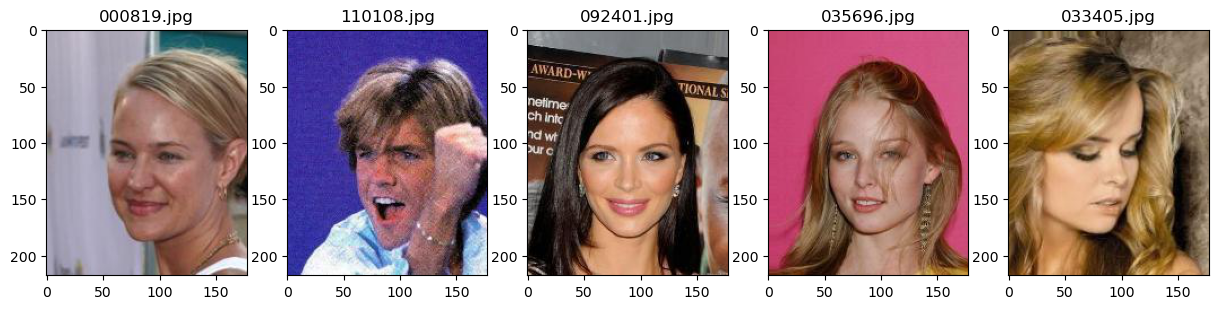

In [5]:
def show_imgs(images_names):
  imgs = []

  for img in images_names:
    img = Image.open(os.path.join("celebA_train_500/celebA_imgs/", img))
    imgs.append(np.array(img))

  f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
  for i, axis in enumerate(axes):
    axes[i].imshow(imgs[i], cmap='gray')
    axes[i].set_title(images_names[i])
  plt.show()

images_names = os.listdir("celebA_train_500/celebA_imgs")[15:20]
show_imgs(images_names)

In [6]:
with open("celebA_train_500/celebA_anno.txt", "r") as f:
  annotations = f.readlines()

In [7]:
train_annotations, val_test_annotations = train_test_split(annotations[:500], test_size=0.3, random_state=42)
val_annotations, test_annotations = train_test_split(val_test_annotations, test_size=0.5, random_state=42)

In [8]:
class CelebADataset(Dataset):
    def __init__(self, root_dir, annotations, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.load_data(annotations)

    def load_data(self, annotations):
        for line in annotations:
            image_id, label = line.strip().split()
            image_path = os.path.join(self.root_dir, image_id)
            if os.path.exists(image_path):
                self.images.append(image_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, int(label)

In [9]:
image_size = (160, 160)
batch_size = 64

transform_train = transforms.Compose([
        transforms.Resize(image_size),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.4),
        transforms.RandomRotation(10, expand=False, center=None),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform_test = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [10]:
train_dataset = CelebADataset("celebA_train_500/celebA_imgs", train_annotations, transform=transform_train)
val_dataset = CelebADataset("celebA_train_500/celebA_imgs", val_annotations, transform=transform_test)
test_dataset = CelebADataset("celebA_train_500/celebA_imgs", test_annotations, transform=transform_test)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Реализуем функцию ArcFace

Реализация происходит следующим образом:

В целом, ArcFace loss - модификация Cross Entropy Loss. Т.е. для обучения мы используем CE loss, но мы обучаемся на модифицированных логитах, которые получаются путем добавления углового маржина (angular margin) к углу между эмбеддингами и весами классов. Этот маржин увеличивает угловое расстояние между различными классами, что улучшает разделимость эмбеддингов и повышает точность распознавания.

In [12]:
class ArcFace(nn.Module):
    def __init__(self, in_features, out_features, s=64.0, m=0.5, easy_margin=False, ls_eps=0.0):
        super(ArcFace, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.ls_eps = ls_eps 
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        self.easy_margin = easy_margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, input, label):
        cosine = F.linear(F.normalize(input), F.normalize(self.weight))
        sine = torch.sqrt(1.0 - torch.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)
        one_hot = torch.zeros(cosine.size(), device=device)
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.out_features
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s

        return output

In [13]:
class ArcFace_model(nn.Module):
    def __init__(self):
        super(ArcFace_model, self).__init__()

        self.encoding = models.resnet34(pretrained=True)
        self.encoding.fc = nn.Linear(self.encoding.fc.in_features, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.arcface = ArcFace(512, 500)

    def forward(self, x, labels=None):
        x = self.encoding(x)
        x = self.bn1(x)
        if labels is not None:
            x = self.arcface(x, labels)
        return x

In [14]:
def train(model, optimizer, criterion, n_epochs, train_loader, val_loader):
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs + 1):
        train_loss = 0.0
        valid_loss = 0.0

        model.train()
        for batch in tqdm(train_loader):
            image, label = batch[0].to(device), torch.as_tensor(batch[1]).to(device)
            optimizer.zero_grad()
            output = model(image, label)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*image.size(0)

        model.eval()
        with torch.no_grad():
            for batch in tqdm(val_loader):
                image, label = batch[0].to(device), torch.as_tensor(batch[1]).to(device)
                output = model(image, label)
                loss = criterion(output, label)
                valid_loss += loss.item()*image.size(0)

        # calculate average losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(val_loader.sampler)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_best_weights.pt')
            valid_loss_min = valid_loss

In [15]:
arcface_model = ArcFace_model().to(device)
optimizer = torch.optim.AdamW(arcface_model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

n_epochs = 10

/home/innavakuelnko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/innavakuelnko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/innavakuelnko/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████| 83.3M/83.3M [01:06<00:00, 1.32MB/s]


In [16]:
train(arcface_model, optimizer, criterion, n_epochs, train_loader, val_loader)

100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.89it/s]


Epoch: 1 	Training Loss: 37.296431 	Validation Loss: 35.147805
Validation loss decreased (inf --> 35.147805).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.07it/s]


Epoch: 2 	Training Loss: 27.880757 	Validation Loss: 30.341254
Validation loss decreased (35.147805 --> 30.341254).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  3.00it/s]


Epoch: 3 	Training Loss: 19.419155 	Validation Loss: 25.672576
Validation loss decreased (30.341254 --> 25.672576).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.02it/s]


Epoch: 4 	Training Loss: 10.697384 	Validation Loss: 20.566830
Validation loss decreased (25.672576 --> 20.566830).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.94it/s]


Epoch: 5 	Training Loss: 3.923721 	Validation Loss: 16.569453
Validation loss decreased (20.566830 --> 16.569453).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.03it/s]


Epoch: 6 	Training Loss: 2.057635 	Validation Loss: 14.513600
Validation loss decreased (16.569453 --> 14.513600).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.79it/s]


Epoch: 7 	Training Loss: 1.207049 	Validation Loss: 14.198514
Validation loss decreased (14.513600 --> 14.198514).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.71it/s]


Epoch: 8 	Training Loss: 0.952624 	Validation Loss: 12.429633
Validation loss decreased (14.198514 --> 12.429633).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.31it/s]


Epoch: 9 	Training Loss: 0.821352 	Validation Loss: 14.464042


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.79it/s]


Epoch: 10 	Training Loss: 0.557157 	Validation Loss: 12.500781


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.76it/s]


Epoch: 11 	Training Loss: 0.656126 	Validation Loss: 11.618146
Validation loss decreased (12.429633 --> 11.618146).  Saving model ...


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.80it/s]


Epoch: 12 	Training Loss: 0.757303 	Validation Loss: 12.753387


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.68it/s]


Epoch: 13 	Training Loss: 0.375625 	Validation Loss: 13.748888


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.46it/s]


Epoch: 14 	Training Loss: 0.865229 	Validation Loss: 15.522488


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.82it/s]

Epoch: 15 	Training Loss: 0.684178 	Validation Loss: 13.070110


In [18]:
train_labels = []
train_embedding = []

arcface_model.eval()
with torch.no_grad():
    for batch in tqdm(train_loader):
        image, label = batch[0].to(device), batch[1]
        img_emb = arcface_model(image)
        train_embedding.append(img_emb)
        train_labels.append(label)   

train_labels = [k.item() for i in train_labels for k in i]
train_embedding = [k for i in train_embedding for k in i]
train_embedding = torch.stack((train_embedding))

100%|███████████████████████████████████████████| 11/11 [00:05<00:00,  2.14it/s]


#### Для сравнения эмбеддингов понадобится матрциа сходства.

In [24]:
def sim_matrix(a, b, eps=1e-8):
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return sim_mt.cpu().numpy()

In [25]:
correct_labels = 0
arcface_model.eval()
with torch.no_grad():
    for batch in tqdm(test_dataset):
        image, true_label = batch[0].to(device), batch[1]
        img_emb = arcface_model(image.unsqueeze(0))
        similarities = sim_matrix(img_emb, train_embedding)
        pred_label = train_labels[similarities.argmax()]
        correct_labels += (np.array(pred_label) == np.array(true_label)).sum()

accuracy = correct_labels * 100 / len(test_dataset)

print("model accuracy with ArcFace Loss: {:.2f}%".format(accuracy.item()))

100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 30.47it/s]

model accuracy with ArcFace Loss: 76.00%


С помощью реализации ArcFace Loss удалось добиться accuracy > 70% на тесте. Сохраним модель

In [27]:
torch.save(arcface_model.state_dict(), 'model_weights2.pth')